<a href="https://colab.research.google.com/github/notsogeekynair/datascwpython/blob/main/Data_Science_with_python_Assigment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import google.colab
from google.colab import files
uploaded = files.upload()


Saving data.txt to data (1).txt


In [29]:
"""
Varun Nair
Class: CS 677
Date: 10/6/2024
Homework Problem #1
Description : creating column
"""
#q1
data = pd.read_csv("data.txt",header =None, names =['f1','f2','f3','f4','class'])
data['color'] = data['class'].apply(lambda x: 'green' if x==0 else 'red')

data.head()

,f1,f2,f3,f4,class,color
0,3.62160,8.6661,-2.8073,-0.44699,0,green
1,4.54590,8.1674,-2.4586,-1.46210,0,green
2,3.86600,-2.6383,1.9242,0.10645,0,green
3,3.45660,9.5228,-4.0112,-3.59440,0,green
4,0.32924,-4.4552,4.5718,-0.98880,0,green


In [30]:
"""
Varun Nair
Class: CS 677
Date: 10/6/2024
Homework Problem #1
Description : creating summary table
"""
#q1
mean_std_f1 =data.groupby('class')['f1'].agg(['mean', 'std']).round(2)
mean_std_f2 =data.groupby('class')['f2'].agg(['mean', 'std']).round(2)
mean_std_f3 =data.groupby('class')['f3'].agg(['mean', 'std']).round(2)
mean_std_f4 =data.groupby('class')['f4'].agg(['mean', 'std']).round(2)

summary_table = pd.DataFrame({
    'class':[0,1],
    'mean_f1':[mean_std_f1['mean'][0],mean_std_f1['mean'][1]],
    'std_f1':[mean_std_f1['std'][0],mean_std_f1['std'][1]],
    'mean_f2':[mean_std_f2['mean'][0],mean_std_f2['mean'][1]],
    'std_f2':[mean_std_f2['std'][0],mean_std_f2['std'][1]],
    'mean_f3':[mean_std_f3['mean'][0],mean_std_f3['mean'][1]],
    'std_f3':[mean_std_f3['std'][0],mean_std_f3['std'][1]],
    'mean_f4':[mean_std_f4['mean'][0],mean_std_f4['mean'][1]],
    'std_f4':[mean_std_f4['std'][0],mean_std_f4['std'][1]]
})

all = {
    'class' : 'all',
    'mean_f1': data['f1'].mean(),
    'std_f1': data['f1'].std(),
    'mean_f2': data['f2'].mean(),
    'std_f2': data['f2'].std(),
    'mean_f3': data['f3'].mean(),
    'std_f3': data['f3'].std(),
    'mean_f4': data['f4'].mean(),
    'std_f4': data['f4'].std()
}
summary_table = pd.concat([summary_table, pd.DataFrame([all])], ignore_index=True)
summary_table = summary_table.round(2)

summary_table

,class,mean_f1,std_f1,mean_f2,std_f2,mean_f3,std_f3,mean_f4,std_f4
0,0,2.28,2.02,4.26,5.14,0.80,3.24,-1.15,2.13
1,1,-1.87,1.88,-0.99,5.40,2.15,5.26,-1.25,2.07
2,all,0.43,2.84,1.92,5.87,1.40,4.31,-1.19,2.10


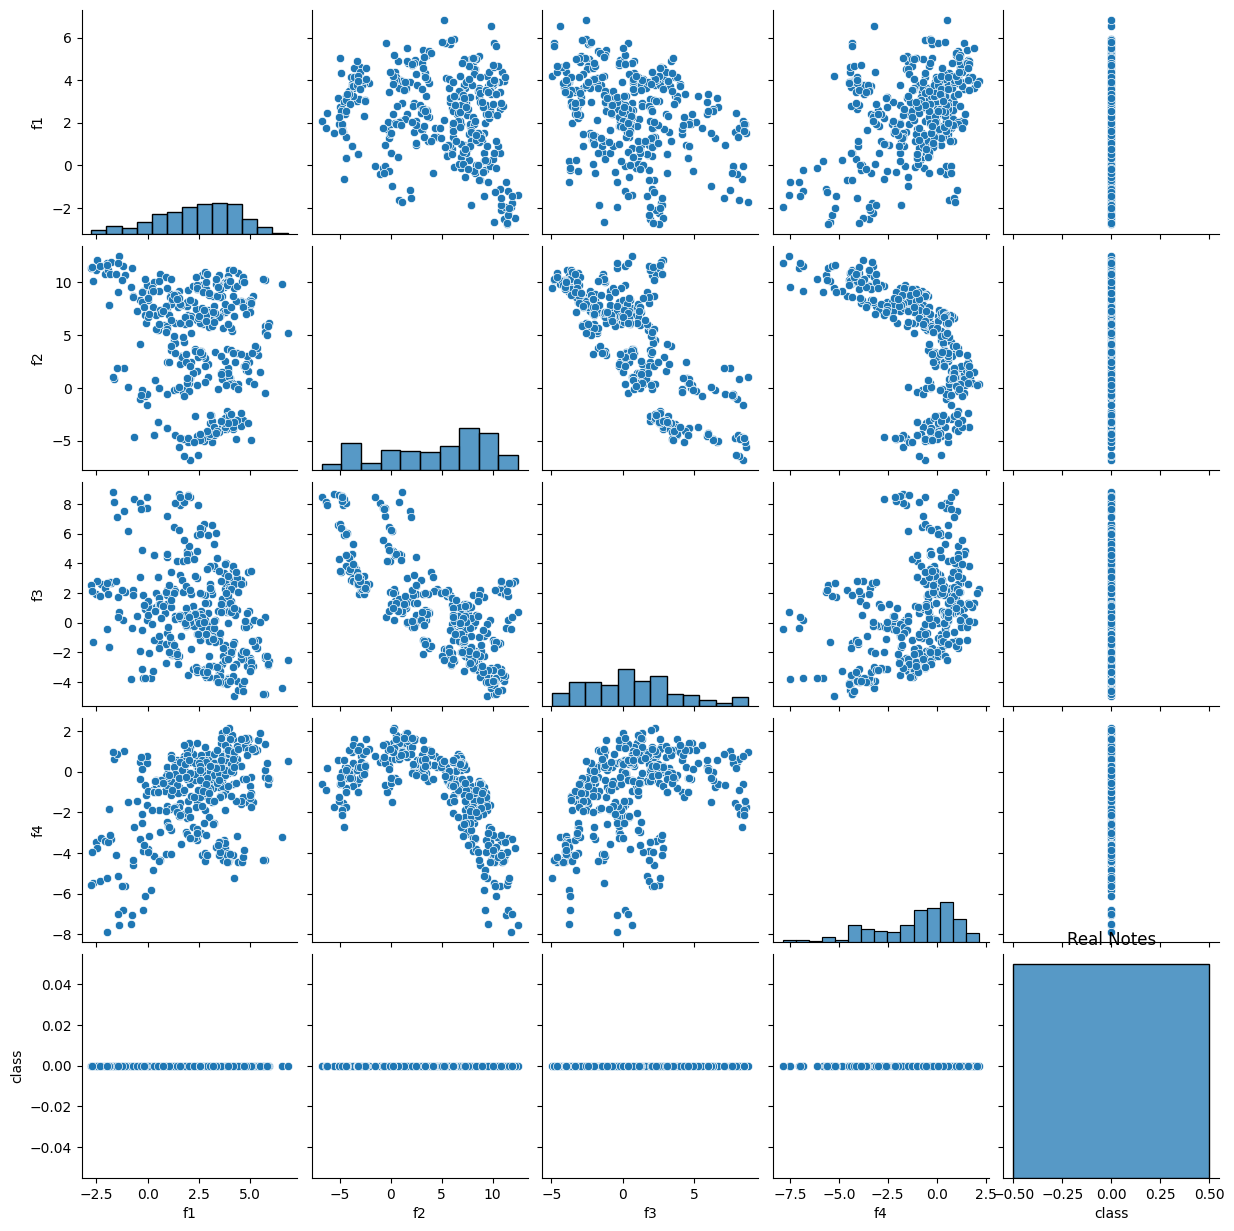

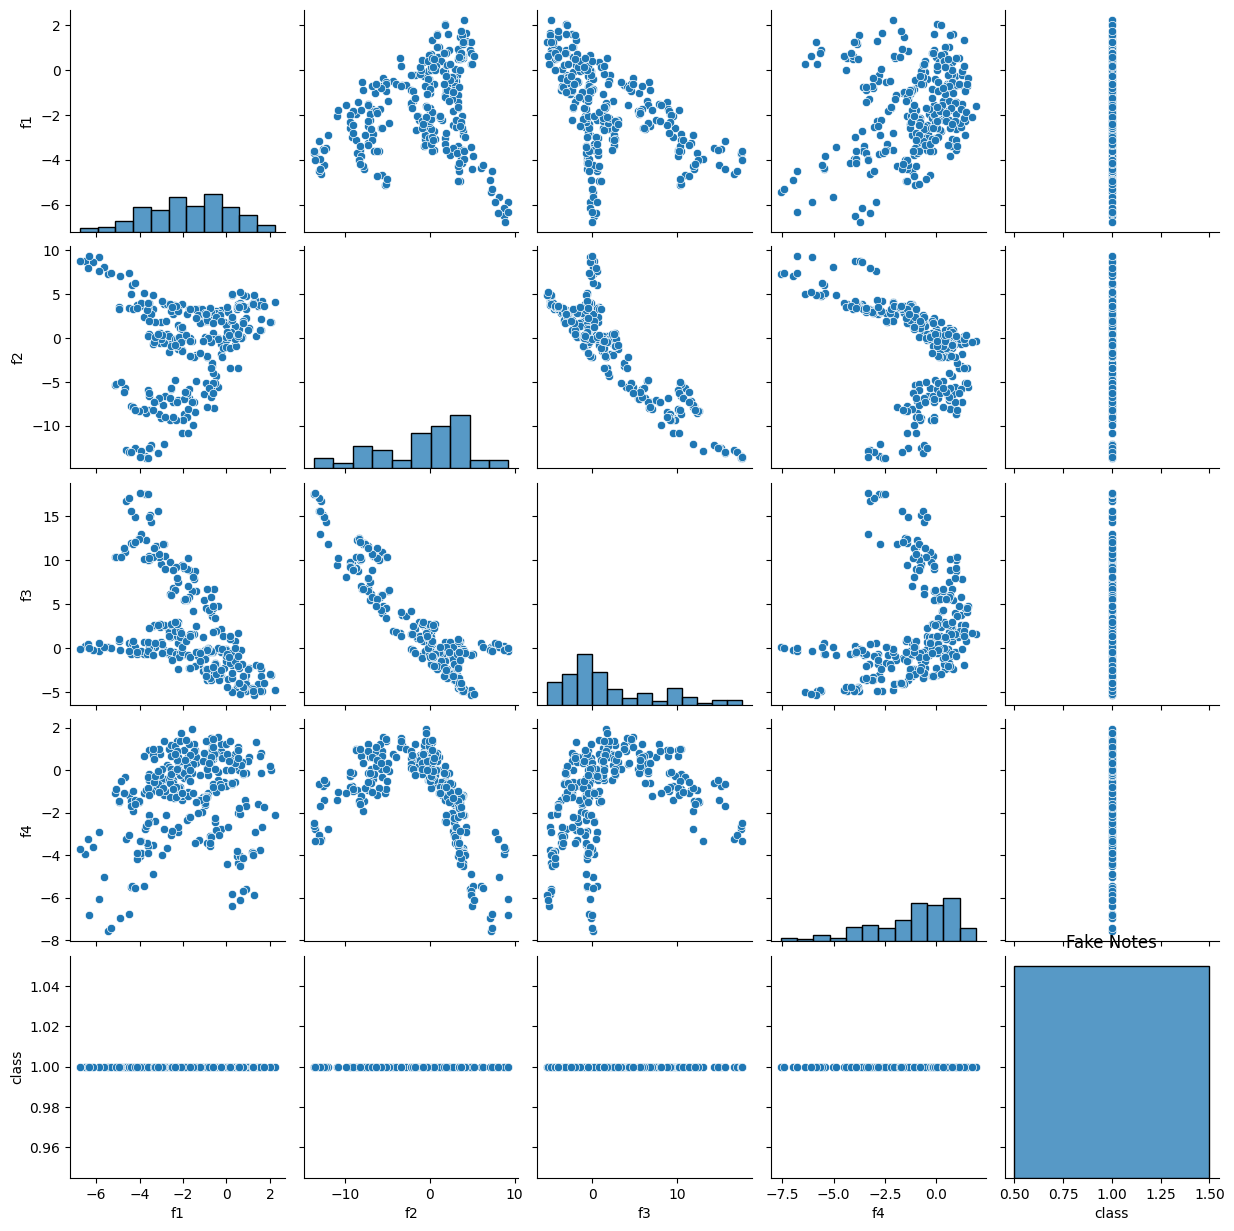

In [31]:
"""
Varun Nair
Class: CS 677
Date: 10/9/2024
Homework Problem #2
Description : creating summary table
"""
#q1
import seaborn as sea
import matplotlib.pyplot as plt

x_train = data.sample(frac=0.5,random_state=154)#using last 3 numbers of BU ID for random_state
x_test = data.drop(x_train.index)

sea.pairplot(x_train[x_train['class']==0])
plt.title('Real Notes')
plt.savefig('good_bills.pdf')


sea.pairplot(x_train[x_train['class']==1])
plt.title('Fake Notes')
plt.savefig('fake_bills.pdf')


In [32]:
"""
Varun Nair
Class: CS 677
Date: 10/9/2024
Homework Problem #2
Description : creating summary table
"""
#q2 q3
pred_labels =[]
for index,row in x_test.iterrows():
  f1 = row['f1']
  f2 = row['f2']
  f3 = row['f3']
  f4 = row['f4']

  if(-2<f3<3) and (1.5<f1<3) and (-5<f4<1):
    pred_labels.append(0)
  else:
    pred_labels.append(1)

x_test['pred_labels'] = pred_labels
x_test.head()

,f1,f2,f3,f4,class,color,pred_labels
8,3.2032,5.7588,-0.75345,-0.61251,0,green,1
10,1.2247,8.7779,-2.21350,-0.80647,0,green,1
12,1.8993,7.6625,0.15394,-3.11080,0,green,0
13,-1.5768,10.8430,2.54620,-2.93620,0,green,1
15,4.6765,-3.3895,3.48960,1.47710,0,green,1


In [33]:
"""
Varun Nair
Class: CS 677
Date: 10/9/2024
Homework Problem #2
Description : creating summary table
"""
#q4
true_labels = x_test['class']
tp=tn=fp=fn=0
for pred,true in zip(pred_labels,true_labels):
  if pred == 1 and true == 1:
    tp+=1
  elif pred == 0 and true == 0:
    tn+=1
  elif pred == 1 and true == 0:
    fp+=1
  elif pred == 0 and true == 1:
    fn+=1
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)
#q5

print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positive Rate: {tpr}")
print(f"True Negative Rate: {tnr}")
print(f"Accuracy: {accuracy}")

True Positives: 315
True Negatives: 40
False Positives: 331
False Negatives: 0
True Positive Rate: 1.0
True Negative Rate: 0.1078167115902965
Accuracy: 0.5174927113702624


In [34]:
"""
Varun Nair
Class: CS 677
Date: 10/9/2024
Homework Problem #3
Description : KNN Classifier
"""
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x = data[['f1', 'f2', 'f3', 'f4']]
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=54)#usinglast 2 numbers of BU ID for random_state
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
k= [3,5,7,9,11]
kaccuracy ={}

for i in k:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  kaccuracy[i] = accuracy
  print(f"K: {i} \n Accuracy: {accuracy}")



K: 3 
 Accuracy: 0.9985422740524781
K: 5 
 Accuracy: 0.9970845481049563
K: 7 
 Accuracy: 0.9970845481049563
K: 9 
 Accuracy: 0.9970845481049563
K: 11 
 Accuracy: 0.9897959183673469


In [44]:
"""
Varun Nair
Class: CS 677
Date: 10/10/2024
Homework Problem #3
Description : KNN Classifier for optimal k
"""
from sklearn.metrics import confusion_matrix

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

knnop = KNeighborsClassifier(n_neighbors=3)
knnop.fit(x_train,y_train)

ypredop = knnop.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)
print("True Positive Rate : ",tpr)
print("True Negative Rate : ",tnr)
print("Accuracy : ",accuracy)

True Positives :  304
True Negatives :  375
False Positives :  7
False Negatives :  0
True Positive Rate :  1.0
True Negative Rate :  0.981675392670157
Accuracy :  0.9897959183673469


In [45]:
import numpy as np

"""
Varun Nair
Class: CS 677
Date: 10/10/2024
Homework Problem #3
Description : testing bill with bu id
"""
test_bill = np.array([[0,1,5,4]])

pred_knn = knnop.predict(test_bill)
print("Predicted Class : ",pred_knn[0])

Predicted Class :  0


In [46]:
"""
Varun Nair
Class: CS 677
Date: 10/10/2024
Homework Problem #4
Description : feature selection
"""
#q1

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x_train = pd.DataFrame(x_train, columns=f)
x_test = pd.DataFrame(x_test, columns=f)
q4acc =[]
f=['f1','f2','f3','f4']

for i in range(len(f)):
  q4xtrain = x_train.drop(columns=[f[i]])
  q4xtest = x_test.drop(columns=[f[i]])
  q4knn = KNeighborsClassifier(n_neighbors=3)
  q4knn.fit(q4xtrain,y_train)
  q4ypred = q4knn.predict(q4xtest)
  q4accuracy = accuracy_score(y_test,q4ypred)
  q4acc.append(q4accuracy)
  print(f"Accuracy without {f[i]} : {q4accuracy}")

Accuracy without f1 : 0.9504373177842566
Accuracy without f2 : 0.9650145772594753
Accuracy without f3 : 0.9577259475218659
Accuracy without f4 : 0.9970845481049563


In [57]:
"""
Varun Nair
Class: CS 677
Date: 10/10/2024
Homework Problem #5
Description : Logistic Regression
"""
#q1

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()
lr.fit(x_train,y_train)

ypredlr = lr.predict(x_test)
accuracy_score(y_test,ypredlr)

print("Logistic Regression Accuracy : ",accuracy_score(y_test,ypredlr))

#q2
lrcm = confusion_matrix(y_test,ypredlr)
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
accuracy = (tp+tn)/(tp+tn+fp+fn)

print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)
print("True Positive Rate : ",tpr)
print("True Negative Rate : ",tnr)
print("Accuracy : ",accuracy)

Logistic Regression Accuracy :  0.9766763848396501
True Positives :  304
True Negatives :  375
False Positives :  7
False Negatives :  0
True Positive Rate :  1.0
True Negative Rate :  0.981675392670157
Accuracy :  0.9897959183673469


In [59]:
import numpy as np

"""
Varun Nair
Class: CS 677
Date: 10/10/2024
Homework Problem #5
Description : Logistic Regression for bu id
"""

#q5

test_bill = np.array([[0,1,5,4]])

pred_lr = lr.predict(test_bill)
print("Predicted Class : ",pred_lr[0])

Predicted Class :  0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [60]:
"""
Varun Nair
Class: CS 677
Date: 10/10/2024
Homework Problem #6
Description : Logistic Regression feature selection
"""

#q1

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

x_train = pd.DataFrame(x_train, columns=f)
x_test = pd.DataFrame(x_test, columns=f)
q4acc =[]
f=['f1','f2','f3','f4']

for i in range(len(f)):
  q6lrtrain = x_train.drop(columns=[f[i]])
  q6lrtest = x_test.drop(columns=[f[i]])
  q6lr = LogisticRegression()
  q6lr.fit(q6lrtrain,y_train)
  q6lrypred = q6lr.predict(q6lrtest)
  q6lraccuracy = accuracy_score(y_test,q6lrypred)
  q4acc.append(q6lraccuracy)
  print(f"Accuracy without {f[i]} : {q6lraccuracy}")

Accuracy without f1 : 0.8061224489795918
Accuracy without f2 : 0.9008746355685131
Accuracy without f3 : 0.8790087463556852
Accuracy without f4 : 0.978134110787172
